In [3]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")


# Load Data

In [11]:
# Load the dataset with error handling
try:
    df = pd.read_csv("../data/Chocolate Sales.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the path.")
except Exception as e:
    print(f"Error loading data: {e}")

# Check columns before cleaning
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y", errors="coerce")
else:
    print("'Date' column not found.")

if "Amount" in df.columns:
    df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)
else:
    print("'Amount' column not found.")

# Show 
df.head()

Data loaded successfully.


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


## 2: Understand the dataset structure

In [12]:
# General info
df.info()

# Check for missing values
df.isna().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [13]:
# Show summary statistics
display(df.describe())

,Date,Amount,Boxes Shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


# Understand the dataset

In [14]:
# Check the time range of data
print(df["Date"].min(), "→", df["Date"].max())


2022-01-03 00:00:00 → 2022-08-31 00:00:00


In [15]:
# Total sales and boxes shipped
print("Total Revenue: $", df["Amount"].sum())
print("Total Boxes Shipped:", df["Boxes Shipped"].sum())


Total Revenue: $ 6183625.0
Total Boxes Shipped: 177007


In [16]:
# Unique values per column (overview)
for col in ["Sales Person", "Country", "Product"]:
    print(f"{col}: {df[col].nunique()} unique")


Sales Person: 25 unique
Country: 6 unique
Product: 22 unique


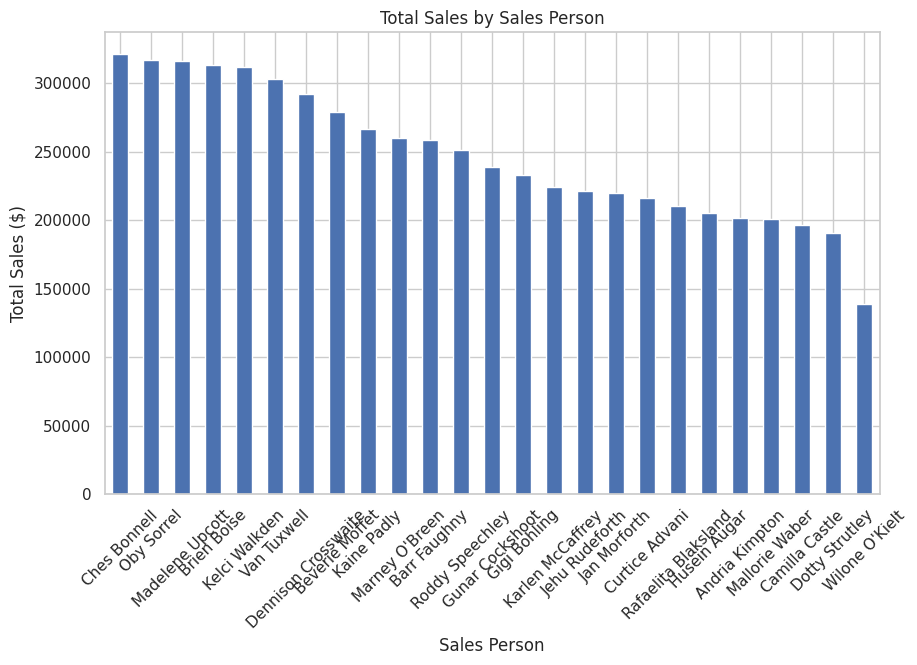

In [17]:
df.groupby("Sales Person")["Amount"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Total Sales by Sales Person")
plt.xlabel("Sales Person")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

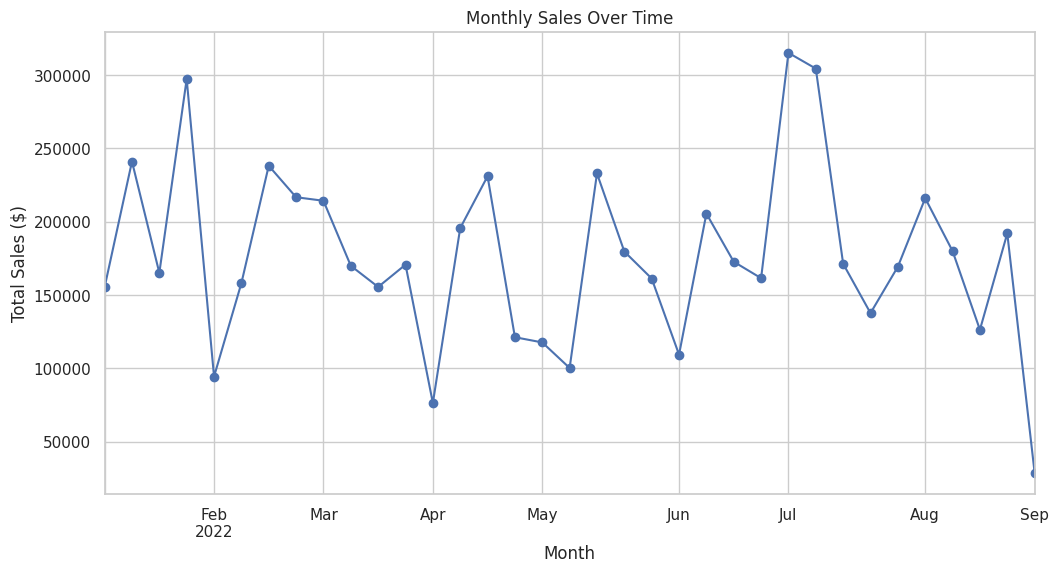

In [23]:
# Group by month and sum sales
df_weekly = df.resample('W', on='Date')["Amount"].sum()

plt.figure(figsize=(12, 6))
df_monthly.plot(marker='o')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

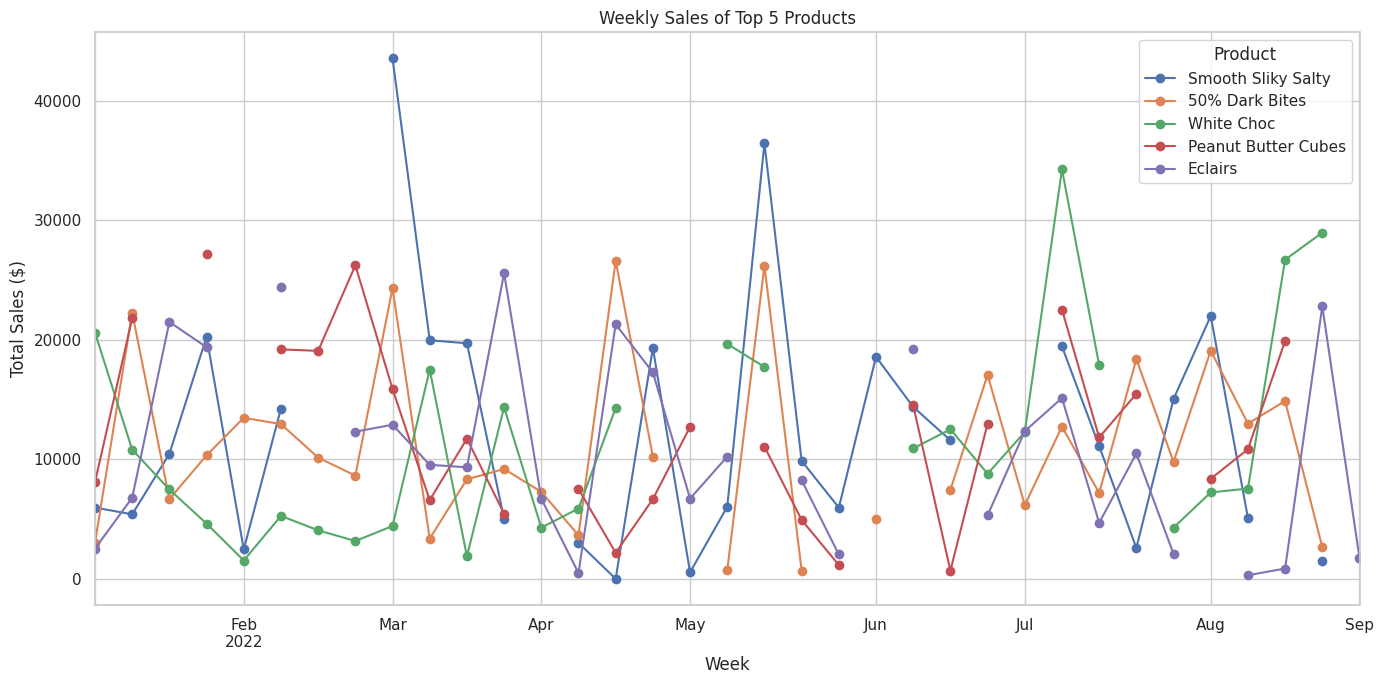

In [24]:
# Plot weekly sales for the top 5 products
weekly_product_sales[top_products].plot(figsize=(14, 7), marker='o')
plt.title("Weekly Sales of Top 5 Products")
plt.xlabel("Week")
plt.ylabel("Total Sales ($)")
plt.legend(title="Product")
plt.grid(True)
plt.tight_layout()
plt.show()

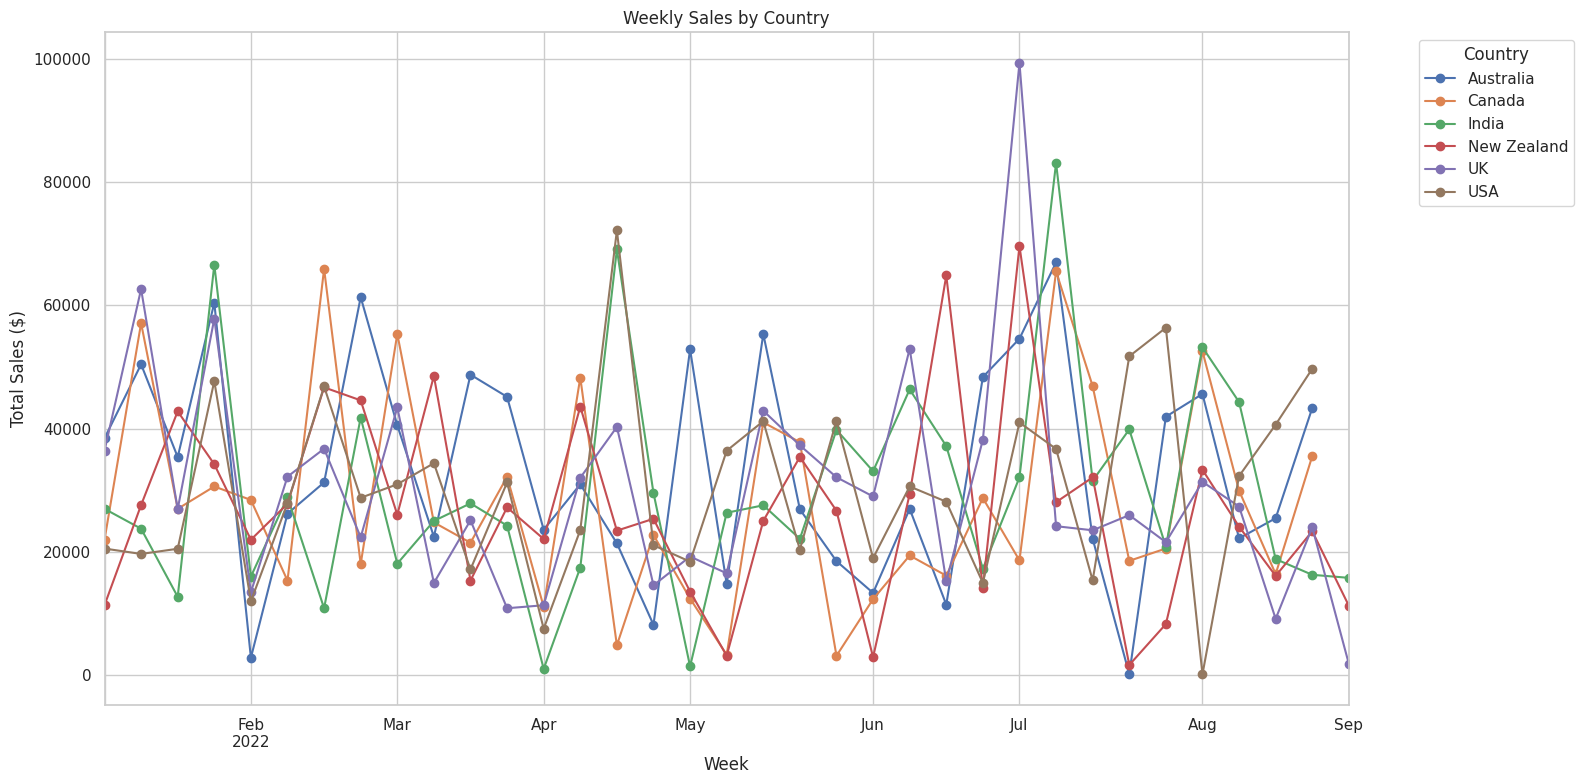

In [21]:
# Group by week and country, then sum sales
weekly_country_sales = df.groupby([pd.Grouper(key="Date", freq="W"), "Country"])["Amount"].sum().unstack()

plt.figure(figsize=(16, 8))
weekly_country_sales.plot(ax=plt.gca(), marker='o')
plt.title("Weekly Sales by Country")
plt.xlabel("Week")
plt.ylabel("Total Sales ($)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()